# "2019 April Portfolio BackTest"
> "2019 April portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [78]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [79]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [80]:
#hide_input
df_testp=df_testp[['Company Name','Date', 'Ticker', 'label',  'pred', 'prof0.0', 'prof-1.0',
       'prof1.0', 'return1&2', 'return1&2&3', 'return1&2&3&4', 'return2',
       'return1', 'return3', 'return4', 'cumulative_return1',
       'cumulative_return1&2', 'cumulative_return1&2&3',
       'cumulative_return1&2&3&4']].copy()

In [81]:
#hide
import datetime
datetoday=f"{datetime.datetime.now():%Y%m%d}"
dateyesterday=int(datetoday)-6;dateyesterday

20200423

In [82]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20190401].loc[df_testp.Date<20190501].sort_values(by='Date',ascending=True).copy().reset_index()

**Long-Short Portfolio**

In [83]:
#hide
#df_testp=df_testp.loc[df_testp.Date>=20200201].copy().reset_index()
df_testp['indexx']=range(len(df_testp))

In [84]:
#hide
df_testp['cumulative_return1']=0.0
df_testp['cumulative_return1&2']=0.0
df_testp['cumulative_return1&2&3']=0.0
df_testp['cumulative_return1&2&3&4']=0.0
for l in range(len(df_testp)):
  df_testp['cumulative_return1'][l]=np.prod(df_testp['return1'][:l])
  df_testp['cumulative_return1&2'][l]=np.prod(df_testp['return1&2'][:l])
  df_testp['cumulative_return1&2&3'][l]=np.prod(df_testp['return1&2&3'][:l])
  df_testp['cumulative_return1&2&3&4'][l]=np.prod(df_testp['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [85]:
#hide_input
df_testp

,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,return1&2,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,2149,HOUSTON AMERICAN ENERGY CORP,20190401,HUSA,1.0,1.0,0.143619,0.389211,0.467171,1.000000,...,1.043478,0.958333,1.043478,1.000000,1.043478,1.000000,1.000000,1.000000,1.000000,0
1,2215,URBAN OUTFITTERS INC,20190401,URBN,1.0,1.0,0.140628,0.352523,0.506848,1.040275,...,1.111657,1.036204,1.003929,1.051621,1.016163,1.043478,1.000000,1.000000,1.043478,1
2,2214,BLUE DOLPHIN ENERGY CO,20190401,BDCO,-1.0,1.0,0.149498,0.374088,0.476414,1.130000,...,0.980000,1.000000,1.130000,1.000000,0.867257,1.047578,1.040275,1.093975,1.159990,2
3,2213,PATRIOT NATIONAL BANCORP INC,20190401,PNBK,0.0,1.0,0.167268,0.337359,0.495373,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.183764,1.175511,1.236192,1.136790,3
4,2212,PARKERVISION INC,20190401,PRKR,-1.0,1.0,0.162095,0.315219,0.522686,0.913043,...,0.782609,0.913043,1.000000,1.000000,0.857143,1.183764,1.175511,1.236192,1.136790,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2337,"APOGEE ENTERPRISES, INC.",20190426,APOG,1.0,1.0,0.131484,0.353829,0.514687,1.011039,...,1.006523,0.994816,1.016307,0.997270,0.998258,0.535754,0.505983,1.986942,1.271192,188
189,2338,STAR BUFFET INC,20190426,STRZ,-1.0,1.0,0.135980,0.367752,0.496268,0.961538,...,0.961538,1.000000,0.961538,1.000000,1.000000,0.544490,0.511568,2.003392,1.279484,189
190,2340,PIER 1 IMPORTS INC/DE,20190429,PIR,1.0,1.0,0.151122,0.309789,0.539089,1.166364,...,1.214545,0.990297,1.177792,1.046431,0.995105,0.523548,0.491893,1.926338,1.230273,190
191,2339,HELEN OF TROY LTD,20190429,HELE,0.0,1.0,0.128745,0.335072,0.536183,0.973559,...,0.997653,0.979306,0.994132,1.017657,1.006968,0.616631,0.573726,2.351133,1.494223,191


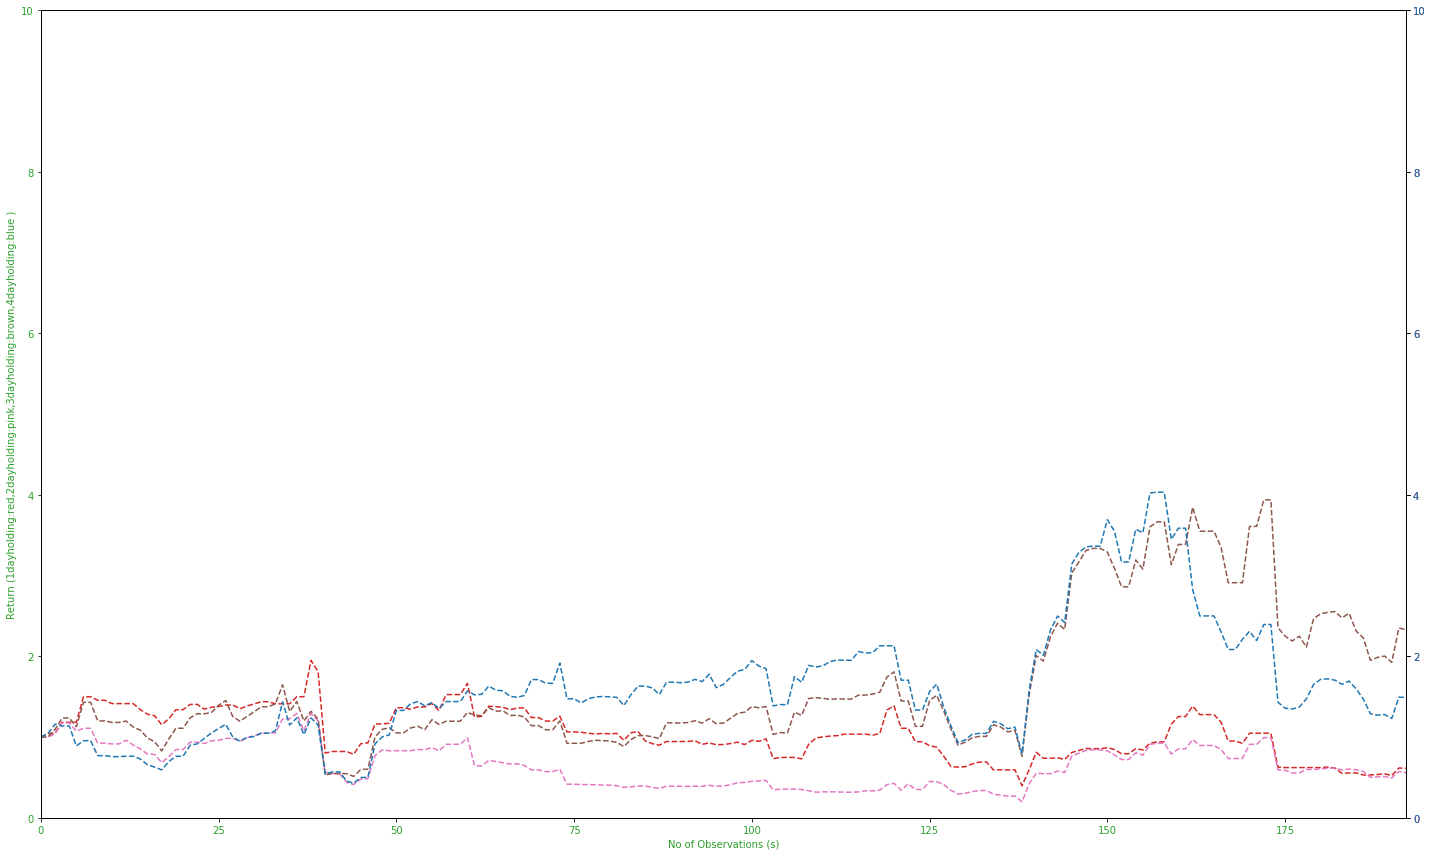

In [86]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_testp['indexx'], df_testp['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_testp['indexx'], df_testp['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,10
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_testp['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)


fig.tight_layout()

**Long portfolio**

In [87]:
#hide_input
df_long=df_testp.copy()
df_long=df_long.loc[df_long.pred==1.0].sort_values(by='Date',ascending=True).reset_index()


In [88]:
#hide_input
df_long['indexx']=range(len(df_long))

In [89]:
#hide
df_long['cumulative_return1']=0.0
df_long['cumulative_return1&2']=0.0
df_long['cumulative_return1&2&3']=0.0
df_long['cumulative_return1&2&3&4']=0.0
for l in range(len(df_long)):
  df_long['cumulative_return1'][l]=np.prod(df_long['return1'][:l])
  df_long['cumulative_return1&2'][l]=np.prod(df_long['return1&2'][:l])
  df_long['cumulative_return1&2&3'][l]=np.prod(df_long['return1&2&3'][:l])
  df_long['cumulative_return1&2&3&4'][l]=np.prod(df_long['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [90]:
#hide_input
df_long

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,0,2149,HOUSTON AMERICAN ENERGY CORP,20190401,HUSA,1.0,1.0,0.143619,0.389211,0.467171,...,1.043478,0.958333,1.043478,1.000000,1.043478,1.000000,1.000000,1.000000,1.000000,0
1,66,2193,UNICO AMERICAN CORP,20190401,UNAM,-1.0,1.0,0.146635,0.400320,0.453045,...,0.992982,0.987910,1.015789,1.000000,0.989510,1.043478,1.000000,1.000000,1.043478,1
2,65,2150,NEW PEOPLES BANKSHARES INC,20190401,NWPP,-1.0,1.0,0.193561,0.314863,0.491576,...,0.956250,1.000000,0.978125,0.977636,1.000000,1.059954,1.003509,1.003509,1.036156,2
3,64,2151,"VirTra, Inc",20190401,VTSI,-1.0,1.0,0.105947,0.386843,0.507210,...,0.994845,0.982069,0.994639,1.026385,0.992288,1.036768,0.981557,0.959605,0.990824,3
4,62,2153,TAITRON COMPONENTS INC,20190401,TAIT,1.0,1.0,0.143045,0.405304,0.451651,...,1.066667,1.006734,1.100000,0.973244,0.989691,1.031210,0.958789,0.962078,0.985716,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,188,2337,"APOGEE ENTERPRISES, INC.",20190426,APOG,1.0,1.0,0.131484,0.353829,0.514687,...,1.006523,0.994816,1.016307,0.997270,0.998258,0.402785,0.588946,1.268938,0.894373,168
169,189,2338,STAR BUFFET INC,20190426,STRZ,-1.0,1.0,0.135980,0.367752,0.496268,...,0.961538,1.000000,0.961538,1.000000,1.000000,0.409353,0.595447,1.279444,0.900207,169
170,191,2339,HELEN OF TROY LTD,20190429,HELE,0.0,1.0,0.128745,0.335072,0.536183,...,0.997653,0.979306,0.994132,1.017657,1.006968,0.393609,0.572545,1.230234,0.865584,170
171,190,2340,PIER 1 IMPORTS INC/DE,20190429,PIR,1.0,1.0,0.151122,0.309789,0.539089,...,1.214545,0.990297,1.177792,1.046431,0.995105,0.391299,0.557406,1.218853,0.863552,171


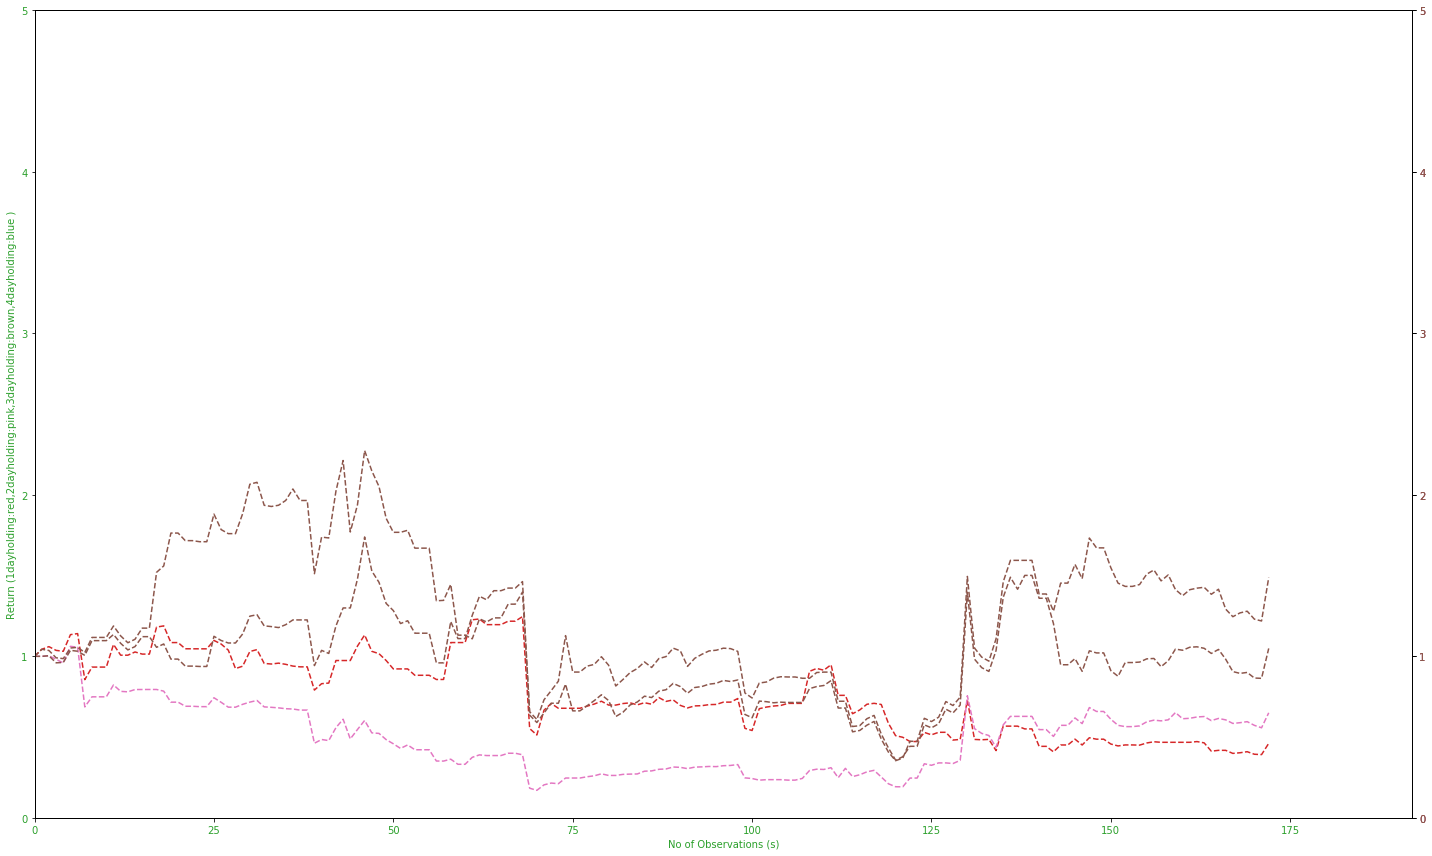

In [91]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_long['indexx'], df_long['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_long['indexx'], df_long['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_long['indexx'], df_long['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_long['indexx'], df_long['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5

a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_long['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()

**Short Portfolio**

In [92]:
#hide_input
df_short=df_testp.copy()
df_short=df_short.loc[df_short.pred==-1.0].sort_values(by='Date',ascending=True).reset_index()

In [93]:
#hide_input
df_short['indexx']=range(len(df_short))

In [94]:
#hide
df_short['cumulative_return1']=0.0
df_short['cumulative_return1&2']=0.0
df_short['cumulative_return1&2&3']=0.0
df_short['cumulative_return1&2&3&4']=0.0
for l in range(len(df_short)):
  df_short['cumulative_return1'][l]=np.prod(df_short['return1'][:l])
  df_short['cumulative_return1&2'][l]=np.prod(df_short['return1&2'][:l])
  df_short['cumulative_return1&2&3'][l]=np.prod(df_short['return1&2&3'][:l])
  df_short['cumulative_return1&2&3&4'][l]=np.prod(df_short['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [95]:
#hide_input
df_short

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,20,2216,TITAN PHARMACEUTICALS INC,20190401,TTNP,-1.0,-1.0,0.156519,0.437223,0.406259,...,1.176792,1.057143,1.048913,1.006061,1.054878,1.000000,1.000000,1.000000,1.000000,0
1,36,2226,"Nu-Med Plus, Inc.",20190401,NUMD,1.0,-1.0,0.087140,0.480886,0.431974,...,0.832547,0.832547,1.000000,1.000000,1.000000,1.048913,1.108851,1.115571,1.176792,1
2,46,2192,"INNOVUS PHARMACEUTICALS, INC.",20190401,INNV,-1.0,-1.0,0.091499,0.472836,0.435665,...,1.825079,1.262899,1.253211,1.050000,1.098246,1.048913,0.923171,0.928766,0.979735,2
3,54,2161,CVD EQUIPMENT CORP,20190401,CVV,-1.0,-1.0,0.099196,0.465781,0.435023,...,1.029841,1.002646,1.030769,1.076923,0.925287,1.314509,1.461083,1.543435,1.788093,3
4,63,2152,MILESTONE SCIENTIFIC INC.,20190401,MS,1.0,-1.0,0.127532,0.479257,0.393211,...,0.969089,0.984439,0.996095,0.987607,1.000668,1.354956,1.510024,1.717837,1.841451,4
5,67,2170,"MRI INTERVENTIONS, INC.",20190401,MRIC,-1.0,-1.0,0.124161,0.511591,0.364249,...,1.014153,0.971429,1.000000,1.012346,1.031250,1.349664,1.480721,1.663626,1.784530,5
6,105,2251,REFLECT SCIENTIFIC INC,20190403,RSCF,-1.0,-1.0,0.144707,0.468451,0.386842,...,1.250000,1.000000,1.000000,1.250000,1.000000,1.349664,1.438415,1.636045,1.809787,6
7,108,2257,NANOPHASE TECHNOLOGIES Corp,20190404,NANX,-1.0,-1.0,0.111562,0.481908,0.406530,...,0.989099,0.872727,1.083333,1.064516,0.982759,1.349664,1.438415,2.045057,2.262234,7
8,114,2262,"AXIM BIOTECHNOLOGIES, INC.",20190408,AXIM,-1.0,-1.0,0.172478,0.432434,0.395088,...,1.055212,1.010667,1.000000,1.022911,1.020690,1.462136,1.359956,2.058251,2.237574,8
9,136,2294,"FICAAR, INC",20190415,OTEL,-1.0,-1.0,0.087451,0.466021,0.446528,...,1.019336,1.005643,1.004494,1.009081,1.000000,1.462136,1.374462,2.127865,2.361114,9


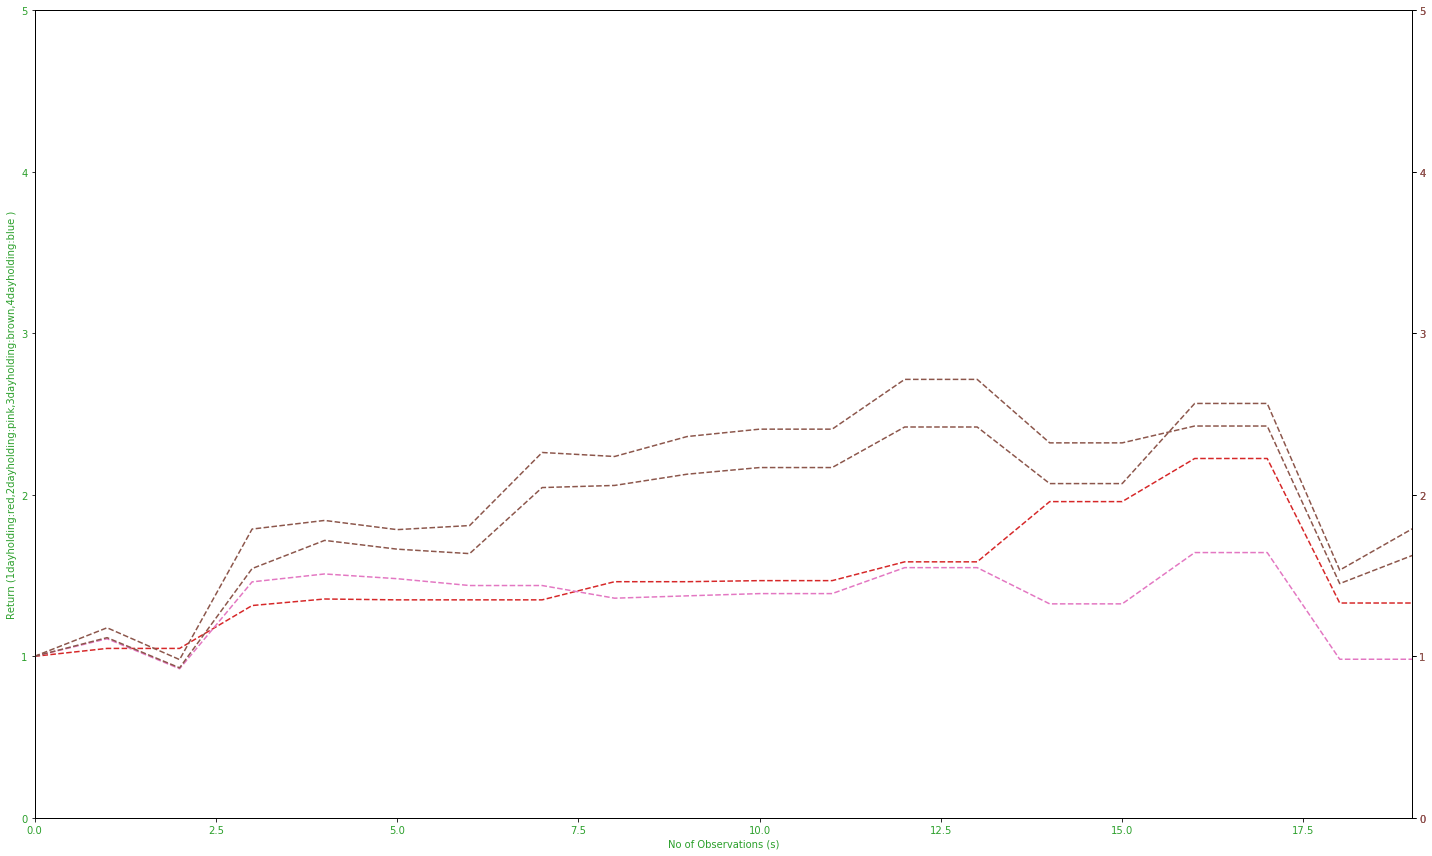

In [96]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_short['indexx'], df_short['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_short['indexx'], df_short['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_short['indexx'], df_short['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_short['indexx'], df_short['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_short['indexx'].min(),df_short['indexx'].max()
#x,y=0,100
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()